In [1]:
using Pkg
Pkg.add("FFTW")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("Test")

    Updating registry at `C:\Users\letha\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\letha\.julia\environments\v1.7\Manifest.toml`


In [2]:
using FFTW
using Plots
using LinearAlgebra
using Test

# DFT Implementation

$$
X(k)=DFT[x(n)]_N=\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi}{N}kn} \text{, }k\in[0, N-1]
$$

In [3]:
# TODO: Implement 2022-04-25 07:57:19%z
function DFT_Implemtation(x)
    N = length(x)

    x_in_k = convert(Array{ComplexF64},zeros(N))
    for k in 1:N # k is in(0, n-1) mathmatically, However, Julia index start from 0
        for n in 1:N
            x_in_k[k] += x[n]*exp(-(2*pi/N)*(k-1)*(n-1)im)
        end
    end

    x_in_k
end

test_fun(x) = cos(x)
x = test_fun.(LinRange(0,20,50))
@test DFT_Implemtation(x) ≈ fft(x)

Test Passed
  Expression: DFT_Implemtation(x) ≈ fft(x)
   Evaluated: ComplexF64[2.9096177710209594 + 0.0im, 3.166118829367836 + 0.833558497503813im, 4.405604878660025 + 2.4211534602239833im, 17.13509240479053 + 15.246768886656882im, -4.282808694770419 - 5.727341054862322im, -1.3294819291765767 - 2.667450802555731im, -0.5567317984366793 - 1.790007941394055im, -0.21375455461064297 - 1.3570742979878312im, -0.025556493996018365 - 1.0916006952092503im, 0.09061654320202586 - 0.9081985764133719im  …  0.1679593511053539 + 0.7715270029063626im, 0.09061654320203702 + 0.9081985764133385im, -0.025556493995999657 + 1.0916006952092585im, -0.21375455461062787 + 1.3570742979878443im, -0.5567317984366671 + 1.7900079413941061im, -1.329481929176613 + 2.6674508025557695im, -4.282808694770425 + 5.727341054862292im, 17.135092404790456 - 15.246768886656907im, 4.405604878660037 - 2.4211534602240596im, 3.1661188293678344 - 0.8335584975038749im] ≈ ComplexF64[2.90961777102096 + 0.0im, 3.1661188293678366 + 0.8335

# Complexity

$$ O(n^2) $$

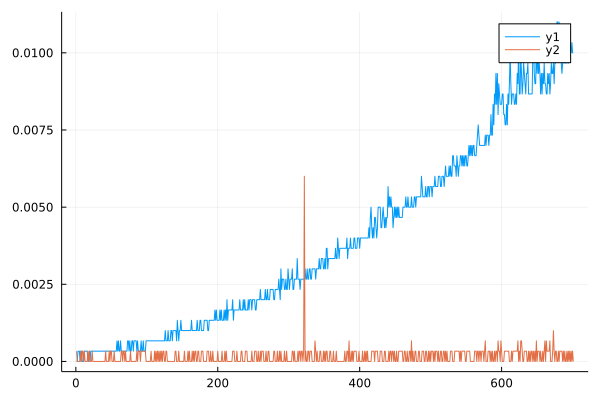

In [4]:
RuningTimes = 3;

DFTTime = []
FFTTime = []

for n in 100:800
    x = test_fun.(LinRange(0,20,n))

    Start = time();
    for i in 1:RuningTimes
        DFT_Implemtation(x)
    end
    push!(DFTTime, time()-Start)

    Start = time();
    for i in 1:RuningTimes
        fft(x)
    end
    push!(FFTTime, time()-Start)

end
plot(DFTTime./RuningTimes)
plot!(FFTTime./RuningTimes)

# Inverse DFT Implementation

$$
x(n)=IDFT[X(k)]_N=\dfrac{1}{N}\sum_{n=0}^{N-1}X(k)e^{j\frac{2\pi}{N}kn} \text{, }k\in[0, N-1]
$$

In [7]:
# TODO: Implement 2022-04-25 07:57:19%z
function IDFT_Implemtation(X)
    N = length(X)

    x_in_n = convert(Array{ComplexF64},zeros(N))
    for n in 1:N # k is in(0, n-1) mathmatically, However, Julia index start from 0
        for k in 1:N
            x_in_n[n] += X[k]*exp((2*pi/N)*(k-1)*(n-1)im)
        end
    end
    
    x_in_n = x_in_n / N

    x_in_n
end

test_fun(x) = cos(x)
x = test_fun.(LinRange(0,20,50))
@test IDFT_Implemtation(x) ≈ ifft(x)

Test Passed
  Expression: IDFT_Implemtation(x) ≈ ifft(x)
   Evaluated: ComplexF64[0.05819235542041919 + 0.0im, 0.06332237658735672 - 0.01667116995007626im, 0.0881120975732005 - 0.04842306920447967im, 0.34270184809581056 - 0.30493537773313767im, -0.08565617389540839 + 0.11454682109724644im, -0.02658963858353158 + 0.05334901605111451im, -0.011134635968733743 + 0.03580015882788105im, -0.004275091092212901 + 0.02714148595975688im, -0.0005111298799203673 + 0.021832013904185005im, 0.0018123308640403206 + 0.01816397152826734im  …  0.0033591870221064196 - 0.015430540058126545im, 0.0018123308640406943 - 0.0181639715282673im, -0.0005111298799199931 - 0.02183201390418573im, -0.004275091092213254 - 0.027141485959756212im, -0.011134635968733333 - 0.03580015882788113im, -0.02658963858353003 - 0.05334901605111503im, -0.08565617389540875 - 0.11454682109724881im, 0.3427018480958071 + 0.30493537773313933im, 0.0881120975732002 + 0.04842306920447963im, 0.06332237658735576 + 0.016671169950077804im] ≈ Compl

# Complexity

$$ O(n^2) $$

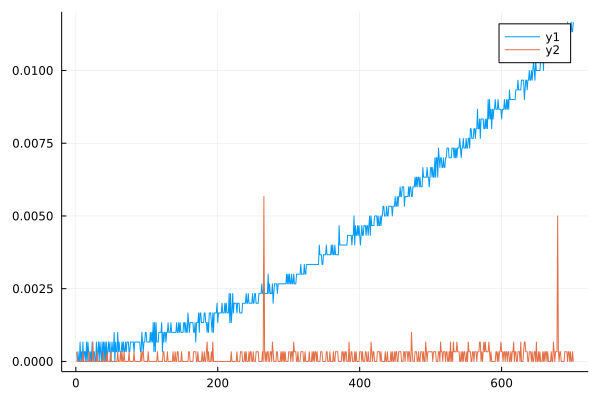

In [9]:
RuningTimes = 3;

IDFTTime = []
IFFTTime = []

for n in 100:800
    x = test_fun.(LinRange(0,20,n))

    Start = time();
    for i in 1:RuningTimes
        IDFT_Implemtation(x)
    end
    push!(IDFTTime, time()-Start)

    Start = time();
    for i in 1:RuningTimes
        ifft(x)
    end
    push!(IFFTTime, time()-Start)

end
plot(IDFTTime./RuningTimes)
plot!(IFFTTime./RuningTimes)